## Yahia Chammami

**VOTING ENSEMBLES**

A voting ensemble (or a “majority voting ensemble“) is an ensemble machine learning model that combines the predictions from multiple other models.

It is a technique that may be used to improve model performance, ideally achieving better performance than any single model used in the ensemble.

**Regression Voting Ensemble:** Predictions are the average of contributing models.

**Classification Voting Ensemble:** Predictions are the majority vote of contributing models.

There are two approaches to the majority vote prediction for classification; they are **hard voting** and **soft voting**.

**Hard Voting:** Predict the class with the largest sum of votes from models


Explanation: Hard voting involves summing the predictions for each class label and predicting the class label with the most votes.

**Soft Voting:** Predict the class with the largest summed probability from models.

Explanation: Soft voting involves summing the predicted probabilities (or probability-like scores) for each class label and predicting the class label with the largest probability.

**IMPLEMENTATION**

In [7]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

In [8]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
    return X, y

In [9]:
# get a voting ensemble of models
def get_voting():
    # Define the base models
    models = list()
    models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    
    # Define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    
    return ensemble

In [10]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn1'] = KNeighborsClassifier(n_neighbors=1)
    models['knn3'] = KNeighborsClassifier(n_neighbors=3)
    models['knn5'] = KNeighborsClassifier(n_neighbors=5)
    models['knn7'] = KNeighborsClassifier(n_neighbors=7)
    models['knn9'] = KNeighborsClassifier(n_neighbors=9)
    models['hard_voting'] = get_voting()  # Assuming you have already defined the get_voting function
    
    return models

In [11]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        return scores

>knn1 0.873 (0.030)
>knn3 0.889 (0.038)
>knn5 0.895 (0.031)
>knn7 0.899 (0.035)
>knn9 0.900 (0.033)
>hard_voting 0.902 (0.034)


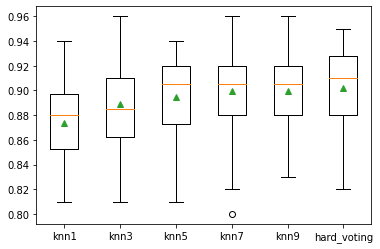

In [12]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# **WHEN WE CAN USE VOTING ENSEMBLE:**

USE VOTING ENSEMBLE MODEL IF:

1.It results in better performance than any model used in the ensemble.

2.It results in a lower variance than any model used in the ensemble.


**VOTING ENSEMBLES ARE MOST EFFECTIVE WHEN:**


1.   Combining multiple fits of a model trained using stochastic learning algorithms.
2.   Combining multiple fits of a model with different hyperparameters.





**LIMITATIONS OF VOTING ENSEMBLES:**

A limitation of the voting ensemble is that it treats all models the same, meaning all models contribute equally to the prediction. This is a problem if some models are good in some situations and poor in others.

Extensions to voting ensembles:

1.Weighted Average Ensemble (blending).

2.Stacked Generalization (stacking).